# Stage II: Task 2: Member

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from numpy import random
from IPython.display import HTML, display
from scipy.stats import iqr
import statsmodels.api as sm
import plotly.express as px
import plotly
import plotly.graph_objs as go
from patsy import dmatrices
import plotly.tools as tls

%matplotlib inline


In [2]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

# Get dataset of states that was created in other notebook

In [3]:
# get state cases and deaths dataset from previous notebook 
# Dataset already normalized per 1 million population
MyStateCases  = pd.read_csv("Data/State_cases.csv").set_index('Date')
MyStateDeaths = pd.read_csv("Data/State_deaths.csv").set_index('Date')
Read = pd.read_csv("../../../data/output/covid.csv")
df = Read.drop(["countyFIPS","stateFIPS","Unnamed: 0"], axis=1)

In [4]:
MyStateCases = MyStateCases.fillna(0)
MyStateDeaths = MyStateDeaths.fillna(0)

print(MyStateCases.tail())
print(MyStateDeaths.tail())

               CA     FL     NC     NY     PA     TX
Date                                                
2020-10-22  173.0  261.0  229.0   84.0  161.0  219.0
2020-10-23  139.0  172.0  314.0   84.0  173.0  227.0
2020-10-24  111.0  208.0    0.0  106.0  160.0  225.0
2020-10-25   53.0  111.0  154.0   84.0  130.0  148.0
2020-10-26  130.0  158.0  364.0   61.0  110.0  163.0
             CA   FL    NC   NY   PA   TX
Date                                     
2020-10-22  2.0  3.0   9.0  1.0  2.0  3.0
2020-10-23  1.0  4.0   0.0  1.0  3.0  3.0
2020-10-24  0.0  4.0  -9.0  0.0  2.0  3.0
2020-10-25  0.0  1.0   0.0  1.0  1.0  2.0
2020-10-26  1.0  1.0  17.0  1.0  1.0  0.0


In [5]:
MyStateCases.TX.describe()

count    279.000000
mean     108.695341
std      114.668887
min        0.000000
25%       14.500000
50%       62.000000
75%      179.000000
max      671.000000
Name: TX, dtype: float64

Text(0.5, 1.0, 'Texas Histogram of New Cases')

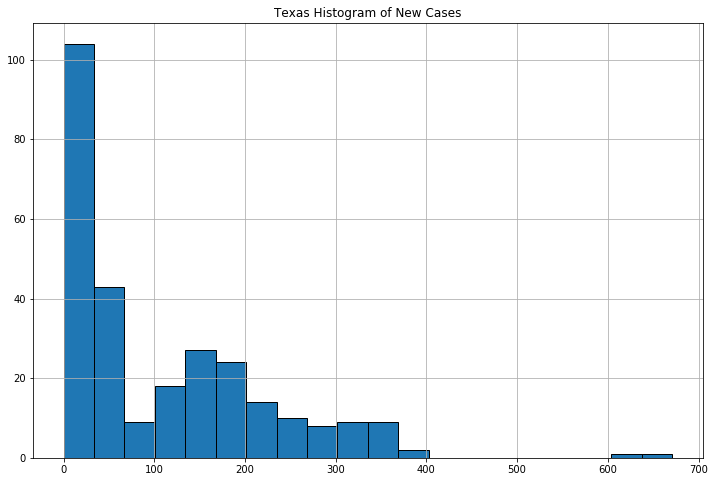

In [6]:
MyStateCases.TX.hist(bins=20, ec='black', figsize=(12,8))
plt.title('Texas Histogram of New Cases')

## 1. Data is skewed, with longer tail to the right. 
## 2. Data is discrete

In [7]:
#look at mean of state of texas
MyStateCases_mean = MyStateCases.mean().round(0)
MyStateCases_mean 

CA     83.0
FL    130.0
NC     89.0
NY     92.0
PA     55.0
TX    109.0
dtype: float64

In [8]:
MyStateDeaths_mean = MyStateDeaths.mean().round(0)
MyStateDeaths_mean 

CA    2.0
FL    3.0
NC    1.0
NY    6.0
PA    2.0
TX    2.0
dtype: float64

## Method to plot a Poisson Distribution. 

In [9]:
def NewPois(df, col='StateOrCounty', title = 'Title', x = 'C_or_D'):
    lm = df[col].mean() # find mean of dataset
    
    #find PMF of every individual Value
    df['PMF'] = stats.poisson.pmf(k=df[[col]],     
                          mu=lm)
    #plot Case or deaths values vs PMF value 
    plt.bar(df[col],df['PMF'], align = 'center')
    plt.title(title)
    plt.ylabel("PMF")
    plt.xlabel(x)
    plt.xlim((lm-40),(lm+40))

    

## Fit number of new COVID-19 cases of Texas to a Poisson Distribution. 

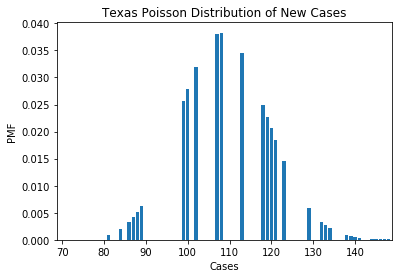

In [10]:
NewPois(MyStateCases, col='TX', title = 'Texas Poisson Distribution of New Cases', x = 'Cases')


## Why distrubution was chosen:
### - Poission Distrubution was chosen because first, we have discrete values. 
### - We cannot have continuous values as cases are a set number value. We cannot have half of a case, it has to be a whole integer.
### - Second, we chose this disturbution because it is a good anaylsis to see the probability of a number of new cases happening in a day 

## Analysis of distribution statistics:
### - As the graph above shows, we can see that in Texas there is a high probability that 100-120 new cases will happen in a day with 107 new cases being the mean. 

# Model a poission distribution of COVID-19 Cases and Deaths of a state and 5 other states per 1 million population. 

In [11]:
# look at all states that we will compare with texas in dataset. 
print(MyStateCases.tail())
print(MyStateDeaths.tail())

               CA     FL     NC     NY     PA     TX           PMF
Date                                                              
2020-10-22  173.0  261.0  229.0   84.0  161.0  219.0  5.106927e-21
2020-10-23  139.0  172.0  314.0   84.0  173.0  227.0  1.598856e-23
2020-10-24  111.0  208.0    0.0  106.0  160.0  225.0  6.942596e-23
2020-10-25   53.0  111.0  154.0   84.0  130.0  148.0  5.569482e-05
2020-10-26  130.0  158.0  364.0   61.0  110.0  163.0  2.480903e-07
             CA   FL    NC   NY   PA   TX
Date                                     
2020-10-22  2.0  3.0   9.0  1.0  2.0  3.0
2020-10-23  1.0  4.0   0.0  1.0  3.0  3.0
2020-10-24  0.0  4.0  -9.0  0.0  2.0  3.0
2020-10-25  0.0  1.0   0.0  1.0  1.0  2.0
2020-10-26  1.0  1.0  17.0  1.0  1.0  0.0


## Plot Poisson Distribution of New Cases for all States
### (already normalized per 1 million population). 

### Texas Poisson Distribution of New Cases

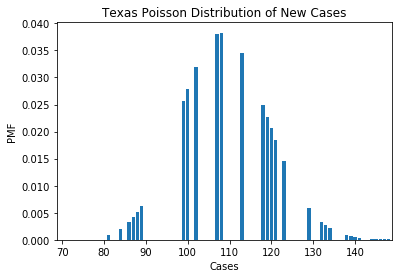

In [12]:
NewPois(MyStateCases, col='TX', title = 'Texas Poisson Distribution of New Cases', x = 'Cases')


### North Carolina Poisson Distribution of New Cases

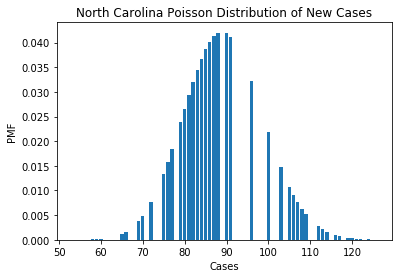

In [13]:
NewPois(MyStateCases, col='NC', title = 'North Carolina Poisson Distribution of New Cases', x = 'Cases')


### California Poisson Distribution of New Cases

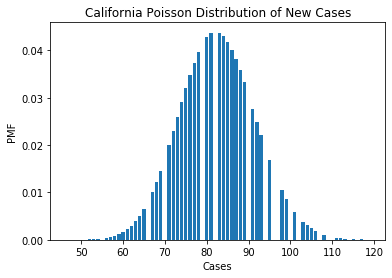

In [14]:
NewPois(MyStateCases, col='CA', title = 'California Poisson Distribution of New Cases', x = 'Cases')


### Florida Poisson Distribution of New Cases

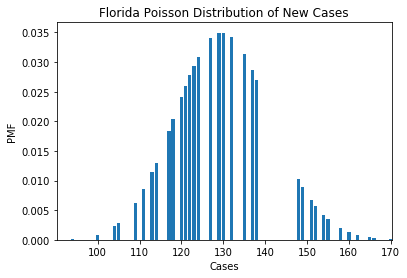

In [15]:
NewPois(MyStateCases, col='FL', title = 'Florida Poisson Distribution of New Cases', x = 'Cases')


### New York Poisson Distribution of New Cases

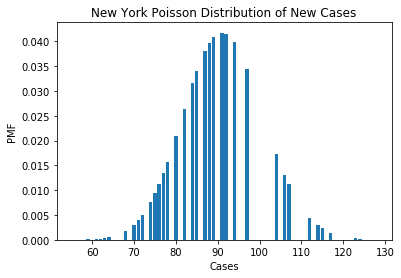

In [16]:
NewPois(MyStateCases, col='NY', title = 'New York Poisson Distribution of New Cases', x = 'Cases')


### Philadelphia Poisson Distribution of New Cases

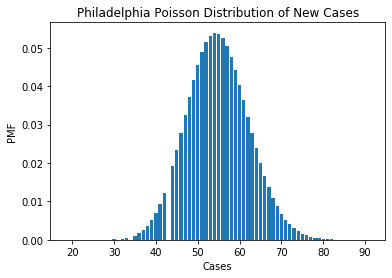

In [17]:
NewPois(MyStateCases, col='PA', title = 'Philadelphia Poisson Distribution of New Cases', x = 'Cases')


## Plot Poisson Distribution of New Deaths for all States
### (already normalized per 1 million population). 

(-0.5, 10)

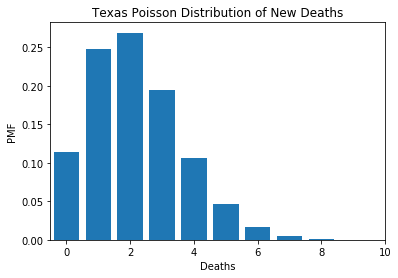

In [18]:
NewPois(MyStateDeaths, col='TX', title = 'Texas Poisson Distribution of New Deaths', x = 'Deaths')
plt.xlim(-0.5,10)

(-0.5, 8)

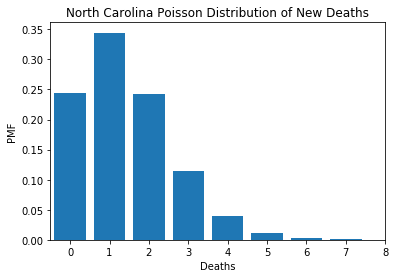

In [19]:
NewPois(MyStateDeaths, col='NC', title = 'North Carolina Poisson Distribution of New Deaths', x = 'Deaths')
plt.xlim(-0.5,8)

(-0.5, 8)

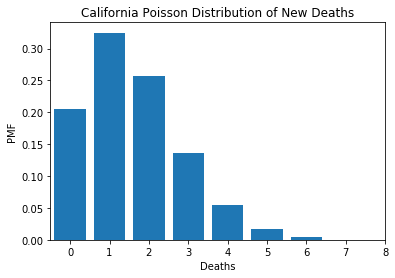

In [20]:
NewPois(MyStateDeaths, col='CA', title = 'California Poisson Distribution of New Deaths', x = 'Deaths')
plt.xlim(-0.5,8)

(-0.5, 15)

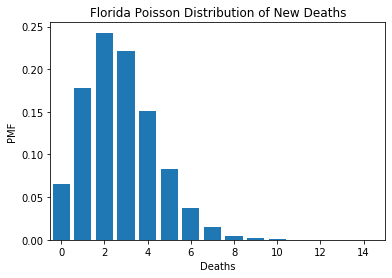

In [21]:
NewPois(MyStateDeaths, col='FL', title = 'Florida Poisson Distribution of New Deaths', x = 'Deaths')
plt.xlim(-0.5,15)

(-0.5, 15)

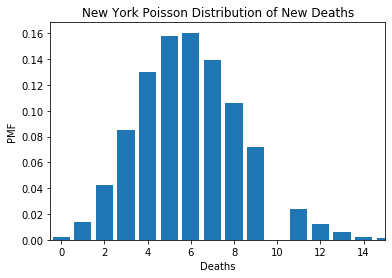

In [22]:
NewPois(MyStateDeaths, col='NY', title = 'New York Poisson Distribution of New Deaths', x = 'Deaths')
plt.xlim(-0.5,15)

(-1, 15)

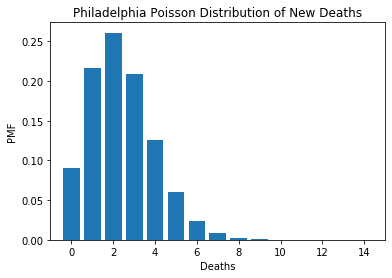

In [23]:
NewPois(MyStateDeaths, col='PA', title = 'Philadelphia Poisson Distribution of New Deaths', x = 'Deaths')
plt.xlim(-1,15)

# Model a poission distribution of COVID-19 Cases and Deaths for top 5 infected North Carolina counties per 200,000 population. 

### Identify top 5 infected counties of North Carolina. 

In [24]:
NC = df.loc[df['State']=='NC']
NC = NC.set_index('County Name')

#look for recent day to see total amount of cases and order the values to see counties with high case and death rates. 
NC

NC_cases = NC.filter(regex = "x")
NC_deaths = NC.filter(regex = "y").drop(["County Name_y"], axis=1)

In [25]:
#display last row which is the total cases 
LastRowCase = NC_cases.iloc[:,-1:]


#Have last row be renamed to total cases 
TotalCases = LastRowCase.rename(columns={list(LastRowCase)[0]: 'Total Cases'})


#print top 5 counties of cases in North Carolina
print(TotalCases.sort_values(by = ['Total Cases'], ascending = False).head(5))

#results will be our five counties that we will work with. 

                    Total Cases
County Name                    
Mecklenburg County        31279
Wake County               19583
Guilford County           10286
Durham County              8484
Forsyth County             7968


In [26]:
#Find population of the top 5 infected counties. 

array = ['Mecklenburg County','Wake County','Guilford County','Durham County', 'Forsyth County']

CountyPop = NC.loc[NC.index.isin(array)]


#get Population value of counties to use later on when normalizing. 
Mecklenburg_Pop = CountyPop.iloc[3][1]
Wake_Pop = CountyPop.iloc[4][1]
Guilford_Pop = CountyPop.iloc[2][1]
Durham_Pop = CountyPop.iloc[0][1]
Forsyth_Pop = CountyPop.iloc[1][1]


In [27]:
Counties_Cases = NC_cases.loc[NC_cases.index.isin(array)].T.rename_axis('Date')
Counties_Deaths = NC_deaths.loc[NC_deaths.index.isin(array)].T.rename_axis('Date')

#change date format for cases
NC_Counties_Cases  = Counties_Cases .T.rename(columns=lambda x: (pd.to_datetime(x.split('_')[0], errors= 'ignore')), errors='raise').T
print(NC_Counties_Cases.tail())

#change date format for deaths
NC_Counties_Deaths  = Counties_Deaths.T.rename(columns=lambda x: (pd.to_datetime(x.split('_')[0], errors= 'ignore')), errors='raise').T
print(NC_Counties_Deaths .tail())

County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-12            8299            7682             9863   
2020-10-13            8327            7742             9947   
2020-10-14            8360            7813            10088   
2020-10-15            8441            7887            10184   
2020-10-16            8484            7968            10286   

County Name  Mecklenburg County  Wake County  
Date                                          
2020-10-12                30502        19160  
2020-10-13                30670        19251  
2020-10-14                30818        19334  
2020-10-15                31074        19454  
2020-10-16                31279        19583  
County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-12              97             105              191   
2020-10-13              97             1

In [28]:
#Calculates differences of cases and deaths of each day (New Cases & New Deaths)
New_NC_Counties_Cases = NC_Counties_Cases.diff()
New_NC_Counties_Deaths = NC_Counties_Deaths.diff()

print(New_NC_Counties_Cases.tail())
print(New_NC_Counties_Deaths.tail())

County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-12            34.0            25.0             75.0   
2020-10-13            28.0            60.0             84.0   
2020-10-14            33.0            71.0            141.0   
2020-10-15            81.0            74.0             96.0   
2020-10-16            43.0            81.0            102.0   

County Name  Mecklenburg County  Wake County  
Date                                          
2020-10-12                136.0         67.0  
2020-10-13                168.0         91.0  
2020-10-14                148.0         83.0  
2020-10-15                256.0        120.0  
2020-10-16                205.0        129.0  
County Name  Durham County  Forsyth County  Guilford County  \
Date                                                          
2020-10-12             0.0             0.0              0.0   
2020-10-13             0.0             0

In [29]:
#calculate and Normalize dataset to cases per 200,000 people. 
norm_val = 200_000

#Normalize cases
Norm_MyNCCases = New_NC_Counties_Cases.assign(Durham_County = lambda x: (x['Durham County'] / Durham_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(Forsyth_County = lambda x: (x['Forsyth County'] / Forsyth_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(Guilford_County = lambda x: (x['Guilford County'] / Guilford_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(Mecklenburg_County = lambda x: (x['Mecklenburg County'] / Mecklenburg_Pop) * norm_val).round(0)
Norm_MyNCCases = Norm_MyNCCases.assign(Wake_County = lambda x: (x['Wake County'] / Wake_Pop) * norm_val).round(0)


#Normalize deaths 
Norm_MyNCDeaths = New_NC_Counties_Deaths.assign(Durham_County = lambda x: (x['Durham County'] / Durham_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(Forsyth_County = lambda x: (x['Forsyth County'] / Forsyth_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(Guilford_County = lambda x: (x['Guilford County'] / Guilford_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(Mecklenburg_County = lambda x: (x['Mecklenburg County'] / Mecklenburg_Pop) * norm_val).round(0)
Norm_MyNCDeaths = Norm_MyNCDeaths.assign(Wake_County = lambda x: (x['Wake County'] / Wake_Pop) * norm_val).round(0)

MyNCCases = Norm_MyNCCases.drop(['Durham County','Forsyth County','Guilford County','Mecklenburg County', 'Wake County'], axis=1)
MyNCDeaths = Norm_MyNCDeaths.drop(['Durham County','Forsyth County','Guilford County','Mecklenburg County', 'Wake County'], axis=1)

print(MyNCCases.tail())
print(MyNCDeaths.tail())  

County Name  Durham_County  Forsyth_County  Guilford_County  \
Date                                                          
2020-10-12            21.0            13.0             28.0   
2020-10-13            17.0            31.0             31.0   
2020-10-14            21.0            37.0             52.0   
2020-10-15            50.0            39.0             36.0   
2020-10-16            27.0            42.0             38.0   

County Name  Mecklenburg_County  Wake_County  
Date                                          
2020-10-12                 24.0         12.0  
2020-10-13                 30.0         16.0  
2020-10-14                 27.0         15.0  
2020-10-15                 46.0         22.0  
2020-10-16                 37.0         23.0  
County Name  Durham_County  Forsyth_County  Guilford_County  \
Date                                                          
2020-10-12             0.0             0.0              0.0   
2020-10-13             0.0             0

In [30]:
MyNCCases = MyNCCases.fillna(0)
MyNCDeaths = MyNCDeaths.fillna(0)


## Plot Poisson Distribution of New Cases for North Carolina Counties per 200,000 population.

(0, 40)

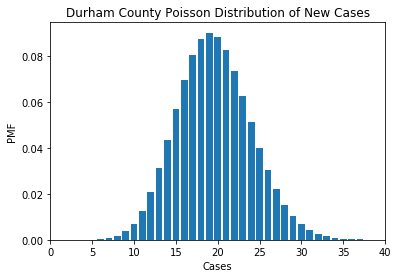

In [31]:
NewPois(MyNCCases, col='Durham_County', title = 'Durham County Poisson Distribution of New Cases',x = 'Cases' )
plt.xlim(0,40)


(0, 35)

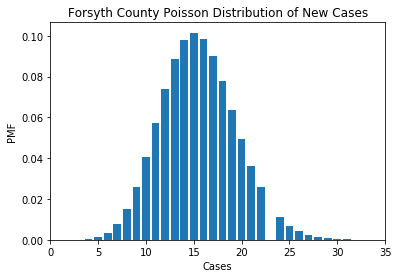

In [32]:
NewPois(MyNCCases, col='Forsyth_County', title = 'Forsyth County Poisson Distribution of New Cases',x = 'Cases' )
plt.xlim(0,35)

(0, 30)

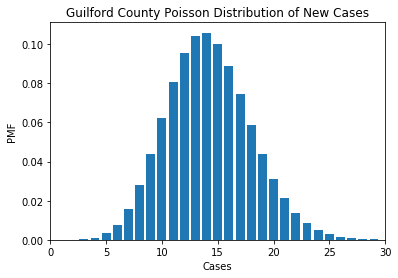

In [33]:
NewPois(MyNCCases, col='Guilford_County', title = 'Guilford County Poisson Distribution of New Cases',x = 'Cases' )
plt.xlim(0,30)

(5, 40)

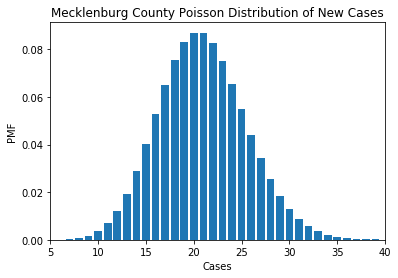

In [34]:
NewPois(MyNCCases, col='Mecklenburg_County', title = 'Mecklenburg County Poisson Distribution of New Cases',x = 'Cases' )
plt.xlim(5,40)

(0, 30)

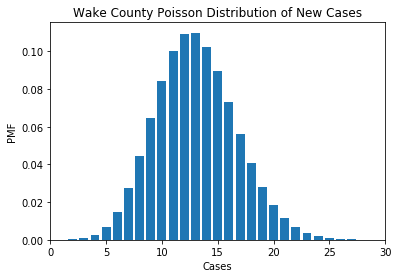

In [35]:
NewPois(MyNCCases, col='Wake_County', title = 'Wake County Poisson Distribution of New Cases',x = 'Cases' )
plt.xlim(0,30)

## Plot Poisson Distribution of New deaths for North Carolina Counties.

(-0.5, 10)

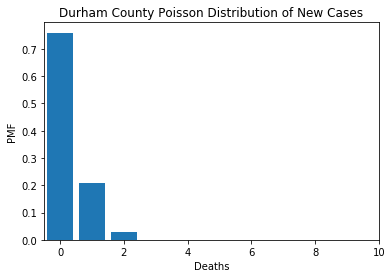

In [36]:
NewPois(MyNCDeaths, col='Durham_County', title = 'Durham County Poisson Distribution of New Cases',x = 'Deaths' )
plt.xlim(-0.5,10)

(-0.5, 10)

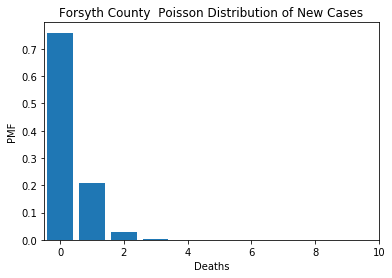

In [37]:
NewPois(MyNCDeaths, col='Forsyth_County', title = 'Forsyth County  Poisson Distribution of New Cases',x = 'Deaths' )
plt.xlim(-0.5,10)

(-0.5, 10)

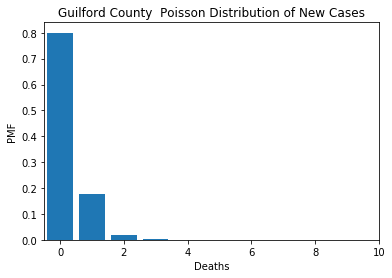

In [38]:
NewPois(MyNCDeaths, col='Guilford_County', title = 'Guilford County  Poisson Distribution of New Cases',x = 'Deaths' )
plt.xlim(-0.5,10)

(-0.5, 10)

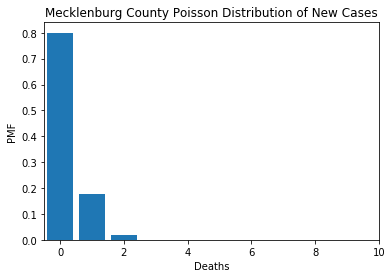

In [39]:
NewPois(MyNCDeaths, col='Mecklenburg_County', title = 'Mecklenburg County Poisson Distribution of New Cases',x = 'Deaths' )
plt.xlim(-0.5,10)

(-0.5, 10)

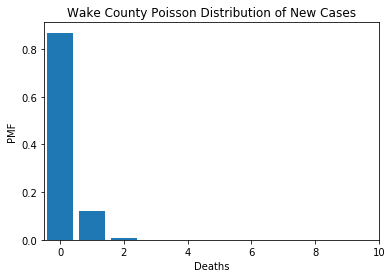

In [40]:
NewPois(MyNCDeaths, col='Wake_County', title = 'Wake County Poisson Distribution of New Cases',x = 'Deaths' )
plt.xlim(-0.5,10)

# Perform Correlation between Enrichment data valuables and COVID-19 Cases

In [41]:
read = pd.read_csv("../../../data/output/COVID19_HOSBEDS_MERGE.csv")

In [42]:
df2 = read.drop(["countyFIPS","stateFIPS","Unnamed: 0"], axis=1)
df2 = df2.drop(df.loc[df['County Name'] == "Statewide Unallocated"].index)

In [43]:
Enrich_States = df2.groupby(['State']).sum()
Enrich_States.head()

,population,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,1/29/20_x,1/30/20_x,...,10/20/20_y,10/21/20_y,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
State,,,,,,,,,,,,,,,,,,,,,
AK,731545,0,0,0,0,0,0,0,0,0,...,67,68,1832.0,1532.0,193.0,193.0,76.0,8.963031,300.0,41.0
AL,4903185,0,0,0,0,0,0,0,0,0,...,2804,2828,18611.0,15138.0,1637.0,1637.0,569.0,52.147326,3473.0,383.0
AR,3017804,0,0,0,0,0,0,0,0,0,...,1727,1751,12729.0,10012.0,914.0,914.0,247.0,42.606742,2717.0,261.0
AZ,7278717,0,0,0,0,1,1,1,1,1,...,5837,5854,18345.0,15695.0,1882.0,1882.0,532.0,56.815879,2650.0,427.0
CA,39512223,0,0,0,0,2,3,3,4,4,...,17049,17214,83240.0,77808.0,8652.0,8652.0,3858.0,216.458434,5432.0,1986.0


In [44]:
MyVar = Enrich_States[['population','10/21/20_x','NUM_STAFFED_BEDS','NUM_ICU_BEDS','AVG_VENTILATOR_USAGE']]
MyVar_Cases = MyVar.rename(columns ={"10/21/20_x" : "Cases"})
MyVar_Cases.head()

,population,Cases,NUM_STAFFED_BEDS,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE
State,,,,,
AK,731545,11599,1532.0,193.0,41.0
AL,4903185,175674,15138.0,1637.0,383.0
AR,3017804,99597,10012.0,914.0,261.0
AZ,7278717,233912,15695.0,1882.0,427.0
CA,39512223,886954,77808.0,8652.0,1986.0


In [45]:
Value = 500_000
Norm_Enrich = pd.DataFrame()

Norm_Enrich['Cases'] = ((MyVar_Cases['Cases'] / MyVar_Cases['population']) * Value).round(0)
Norm_Enrich['NUM_STAFFED_BEDS'] = ((MyVar_Cases['NUM_STAFFED_BEDS'] / MyVar_Cases['population']) * Value).round(0)
Norm_Enrich['NUM_ICU_BEDS'] = ((MyVar_Cases['NUM_ICU_BEDS'] / MyVar_Cases['population']) * Value).round(0)
Norm_Enrich['AVG_VENTILATOR_USAGE'] = ((MyVar_Cases['AVG_VENTILATOR_USAGE'] / MyVar_Cases['population']) * Value).round(0)




Norm_Enrich.head()

,Cases,NUM_STAFFED_BEDS,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE
State,,,,
AK,7928.0,1047.0,132.0,28.0
AL,17914.0,1544.0,167.0,39.0
AR,16502.0,1659.0,151.0,43.0
AZ,16068.0,1078.0,129.0,29.0
CA,11224.0,985.0,109.0,25.0


## Does higher number of staffed beds lead to higher covid case numbers?

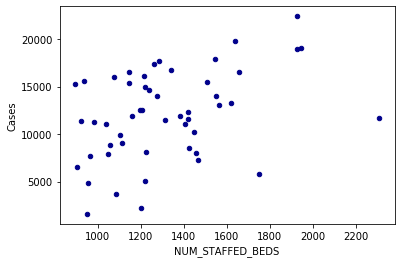

In [46]:
Staffed_Beds_Plot = Norm_Enrich.plot.scatter(x = 'NUM_STAFFED_BEDS',y ='Cases',c ='DarkBlue')

## Does higher number of ICU beds lead to higher covid case numbers?

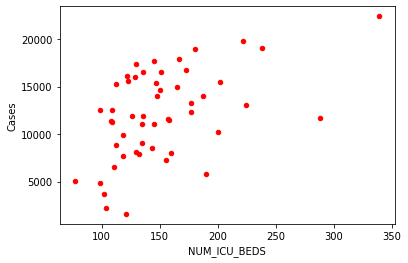

In [47]:
ICUBeds_Plot = Norm_Enrich.plot.scatter(x = 'NUM_ICU_BEDS',y ='Cases',c ='Red')

## Does higher number of average ventilator usage lead to higher covid case numbers?

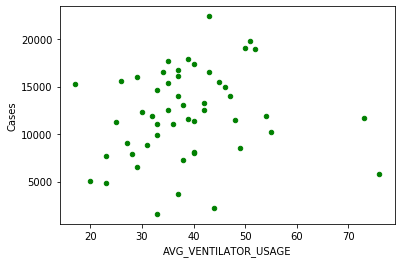

In [48]:
Vent_Plot = Norm_Enrich.plot.scatter(x = 'AVG_VENTILATOR_USAGE',y ='Cases',c ='Green')
Vent_Plot

### Correlation between cases and enrichment variables. 

In [49]:
Norm_Enrich.corr()[0:1]

,Cases,NUM_STAFFED_BEDS,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE
Cases,1.0,0.400107,0.502448,0.132817


# Analysis:
## Cases and Number of ICU Beds have a high correlation between each other